# Visualizing Activation Functions - Lab

## Introduction

Now that you've built your own CNN and seen how to visualize feature maps, its time to practice loading a pretrained model from file and visualize the learned features systematically. In this lab, you'll expand upon the code from the previous lesson in order to succinctly visualize all the channels from each layer in a CNN.

## Objectives

In this lab you will: 

- Load a saved Keras model 
- Use Keras methods to visualize the activation functions in CNNs 

## Load a Model  

For this lab, load the saved model `'cats_dogs_downsampled_with_augmentation_data.h5'`. This saved file includes both the model architecture and the trained weights. See the `model.save()` method for further details. The model was built in order to help identify cat and dog pictures. Start simply by loading the model and pulling up a summary of the layers. (To load the model use the `keras.models.load_model()` function.) 

In [1]:
# Your code here
from keras.models import load_model

model = load_model('cats_dogs_downsampled_with_augmentation_data.h5')

2023-03-14 10:45:36.636766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 10:45:40.138964: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Load an Image

Before you plot the learned representations of the convolutional base, let's import an image and display it prior to processing. This will provide a comparison to the transformations formed by the model's feature maps.   

Load and display the image `'dog.1100.jpg'`.

(1, 150, 150, 3)


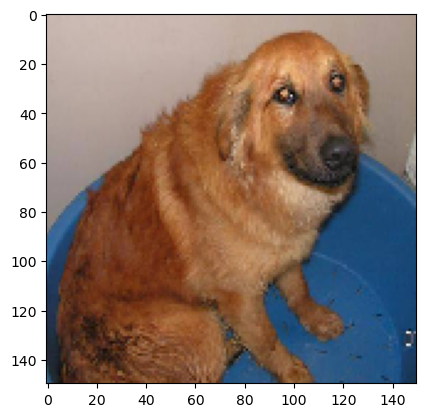

In [16]:
# Your code here
import keras
import numpy as np
import matplotlib.pyplot as plt

img = keras.utils.load_img('dog.1100.jpg', target_size=(150, 150))
img_tensor = keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

print(img_tensor.shape)

plt.imshow(img_tensor[0]);

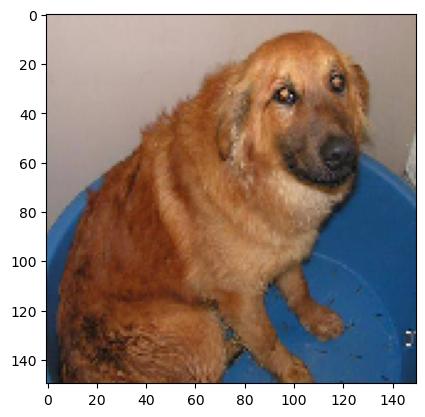

In [17]:
plt.imshow(img);

## Transform the Image to a Tensor and Visualize Again

Recall that you should always preprocess images into tensors when using deep learning. As such, preprocess this image and then redisplay the tensor.

In [ ]:
# Your code here
# above

## Plot Feature Maps

Now that you've loaded a model, practice visualizing each of the channels for each of feature maps of the convolutional layers. Recall that this process will take a few steps. First, extract the feature maps, or layer outputs from each of the activation functions in the model. From there, generate models that transform the image from its raw state to these feature maps. You can then take these transformations and visualize each channel for each feature map.  

To preview the results of the solution code, take a sneak peek at the *Intermediate_Activations_Visualized.pdf* file.

In [28]:
# Your code here

# construct model with model inputs as inputs & layers as outputs

from keras import models

layers = [layer.output for layer in model.layers[:8]] # exclude flatten layer & following layers

activations = models.Model(inputs=model.input, outputs=layers)

activations

In [30]:
# get activations for specific image

activations_for_img = activations.predict(img_tensor)

1/1 [==============================] - 0s 27ms/step


In [54]:
len(activations_for_img) # list of layer outputs for 8 layers

8

In [55]:
activations_for_img[0].shape # shape of output for 0th layer

(1, 148, 148, 32)

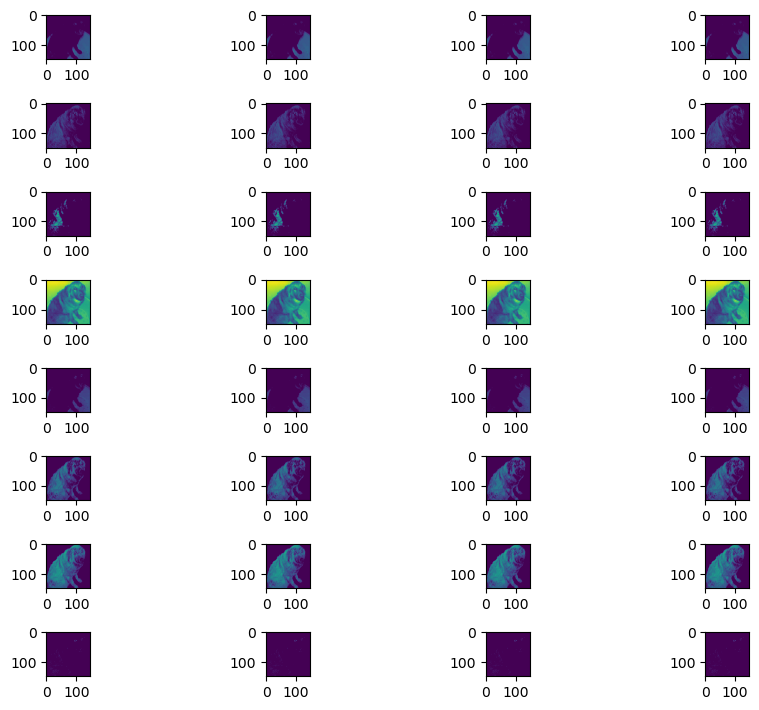

In [56]:
# let's take a look at one filter:
layer_tensor = activations_for_img[0][0] # get 148 * 148 * 32 result for layer 0

# look at filtered image for all 32 filters
fig, ax = plt.subplots(8,4, figsize=(6.4*1.5, 4.8*1.5))

for n in range(32):
    i = n // 4
    j = n % 4
    plt.sca(ax[i][j])
    plt.imshow(layer_tensor[:,:,i])
    
fig.tight_layout();

In [57]:
for layer_tensor in activations_for_img:
    print(layer_tensor[0].shape)

(148, 148, 32)
(74, 74, 32)
(72, 72, 64)
(36, 36, 64)
(34, 34, 128)
(17, 17, 128)
(15, 15, 128)
(7, 7, 128)


Let's compare the 16th filter across all convolution and pooling layers.

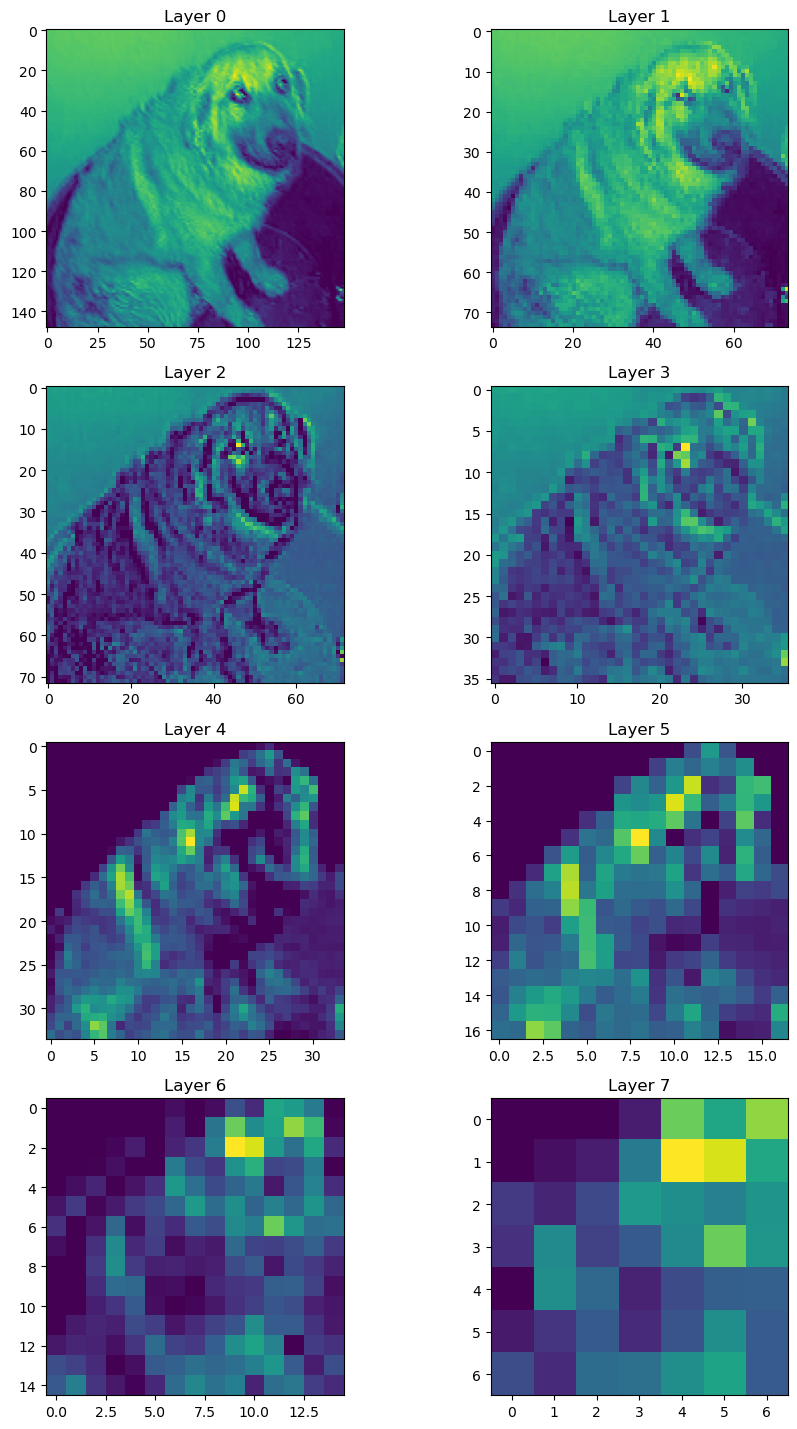

In [64]:
# set up figure
fig, ax = plt.subplots(4,2, figsize=(6.4*1.5, 4.8*3))

# get 16th filter for each layer
for i, layer_tensor in enumerate(activations_for_img):
    current = layer_tensor[0,:,:,16] # 16th filter for all layer outputs
    plt.sca(ax[i//2][i%2])
    plt.imshow(current)
    plt.title(f'Layer {i}')
    
fig.tight_layout();

## Summary

Nice work! In this lab, you practiced loading a model and then visualizing the activation feature maps learned by that model on your data! In the upcoming labs and sections you will build upon the first part of this and see how you can adapt the representations learned by more experienced models to your own applications which may have limited training data.